## K-Nearest Neighbors

### Introduction

* Known as KNN and is very easy to understand because of its simplicity

### How does it work?

* The entire training dataset is stored in memory. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.

* Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, with tabular data, a good starting point is the Euclidean distance.

* Once the neighbors are discovered, the summary prediction can be made by returning the most common outcome or taking the average. As such, KNN can be used for classification or regression problems.


There is no model to speak of other than holding the entire training dataset. Because no work is done until a prediction is required, KNN is often referred to as a lazy learning method.

**It is called lazy algorithm because it doesn't learn a discriminative function from the training data but memorizes the training dataset instead.**

![](images/k-NN-wiki.png)

As shown in the description of the above picture, the k-NN algorithm can be summarized as following steps:

* Choose the number of k and a distance metric.
* Find the k nearest neighbors of the sample that we want to classify.
* Assign the class label by majority vote.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### About the dataset - Breast Cancer Wisconsin Diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
df = pd.read_csv('data/data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Check for NA values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

By looking at the dataset, we can see that variable 'id' and variable 'Unnamed: 32' will have no impact on the model building. So we can drop the unneccessary variables.

In [6]:
drop_cols = ['Unnamed: 32','id']
df = df.drop(drop_cols, axis = 1)

In [7]:
df.shape

(569, 31)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualize features

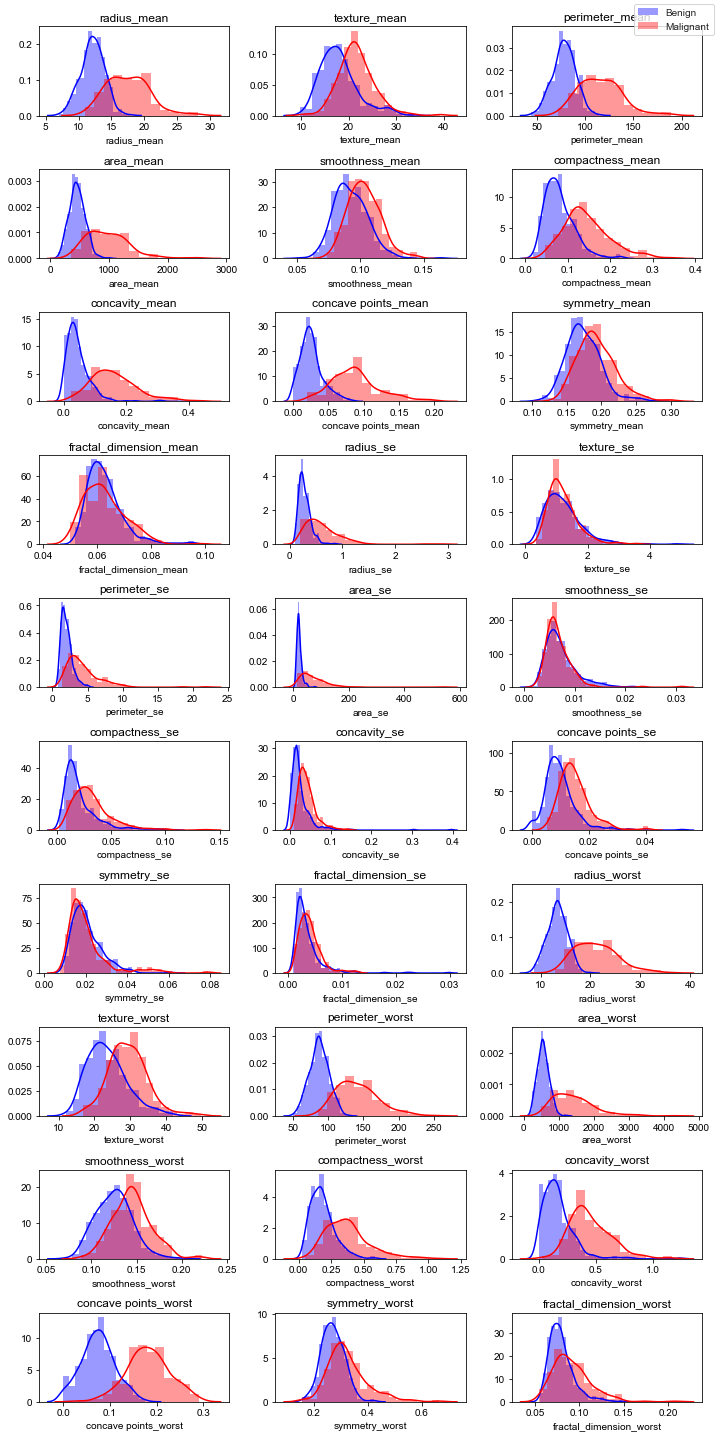

In [9]:
# Plot frequency distributions of the features to visualize which features capture the most variability

df_benign = df[df['diagnosis'] == 0]
df_malignant = df[df['diagnosis'] == 1]

fig = plt.figure(figsize=(10,20))
for i,col_name in enumerate(list(df.columns[1:31])):
    i +=1
    ax = fig.add_subplot(10,3,i)
    sns.distplot(df_benign[col_name], label = 'Benign', kde = True, color= 'b') #Benign-gentle/kind
    sns.distplot(df_malignant[col_name], label= 'Malignant', kde = True, color= 'r')
    ax.set_title(col_name)

sns.set_style("whitegrid")
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

Looking at these distributions it is clear that some features including fractal_dimension_worst, fractal_dimension_mean and smoothness_mean etc. are not differently distributed for both the 'malignant' and 'benign' classes. This means that including these features in our predictive modelling algorithm would not significantly improve its performance (They could even hamper the performance due to undue interaction effects).

For now, let us feed all the features into our predictive model. Instead of relying on visual inspection, we can use sophiscticated techniques like feature selection (selecting the most important features) and feature extraction (PCA) to reduce the dimensions of our data and see if they improve the performance.

### Standardize the variables

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis', axis=1))
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))
df_features = pd.DataFrame(scaled_features, columns = df.columns[1:31])

In [11]:
df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Train Test Split

Use train_test_split to split data into a training set and a testing set.

In [12]:
from sklearn.model_selection import train_test_split
X = df_features
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Using KNN

Import KNeighborsClassifier from scikit learn.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the model
knn.fit(X_train, y_train)

# predict on testing dataset
pred = knn.predict(X_test)

# COnfusion Matrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[100   3]
 [  4  64]]


In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       103
           1       0.96      0.94      0.95        68

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Precision:** ability of a classification model to return only relevant instances

**Recall:** ability of a classification model to identify all relevant instances

**F1 score:** single metric that combines recall and precision using the harmonic mean

### Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [15]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

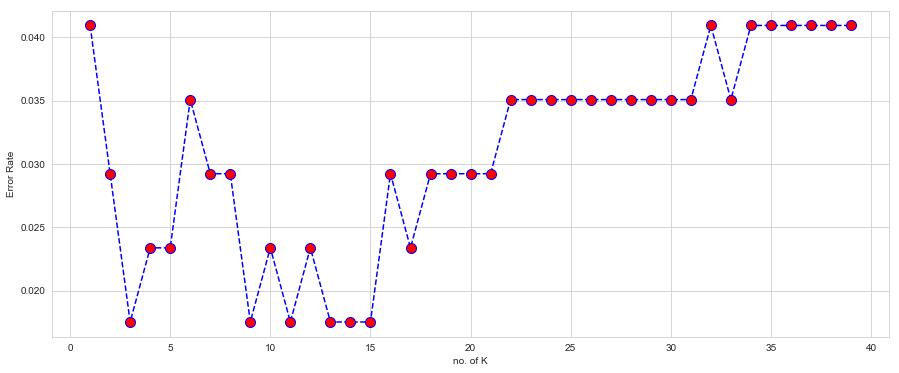

In [16]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

### Retrain with new K Value

Retrain your model with the best K value and re-do the classification report and the confusion matrix.

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[101   2]
 [  1  67]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.97      0.99      0.98        68

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Pros and cons:

**Advantages:**
k-NN is a memory-based approach is that the classifier immediately adapts as we collect new training data.

**Downside:**
The computational complexity for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario.

Note that we can't discard training samples since no training step is involved. Therefore, storage space can be challenging if we work with large datasets.

### Things to consider:

The k-NN is very susceptible to overfitting due to the curse of dimensionality.

The curse of dimensionality happens when the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.

Basically, in a high-dimensional space, even the closest neighbors can be too far away to give a good estimate.

In that case, we use feature selection and dimensionality reduction techniques to avoid the curse of dimensionality.
